# Spaceship Titanic Kaggle Project

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Importing Data

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [5]:
df.shape

(8693, 14)

## Studying Data

In [6]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

There are 4378 people (50.36%) who were transported and 4315 people (49.64%) who were not

<Axes: >

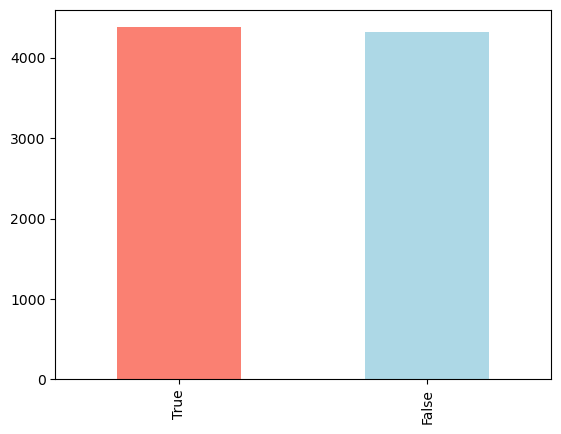

In [7]:
df["Transported"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [11]:
df.median(axis=0, skipna = True)

C:\Users\samee\AppData\Local\Temp\ipykernel_12396\2987398697.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median(axis=0, skipna = True)


PassengerId     463001.0
CryoSleep            0.0
Age                 27.0
VIP                  0.0
RoomService          0.0
FoodCourt            0.0
ShoppingMall         0.0
Spa                  0.0
VRDeck               0.0
Transported          1.0
dtype: float64

<Axes: ylabel='Frequency'>

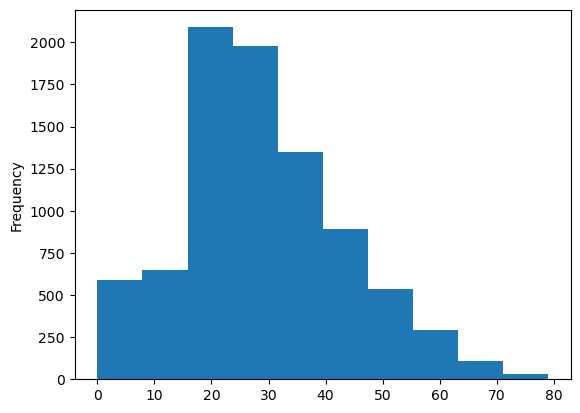

In [12]:
df.Age.plot.hist()

The above histogram shows that most people in our dataset are 16 to 30 years of age

In [13]:
unique_values = df.nunique()
unique_values

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [14]:
df["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [15]:
pd.crosstab(df.HomePlanet, df.Transported)

Transported  False  True 
HomePlanet               
Earth         2651   1951
Europa         727   1404
Mars           839    920

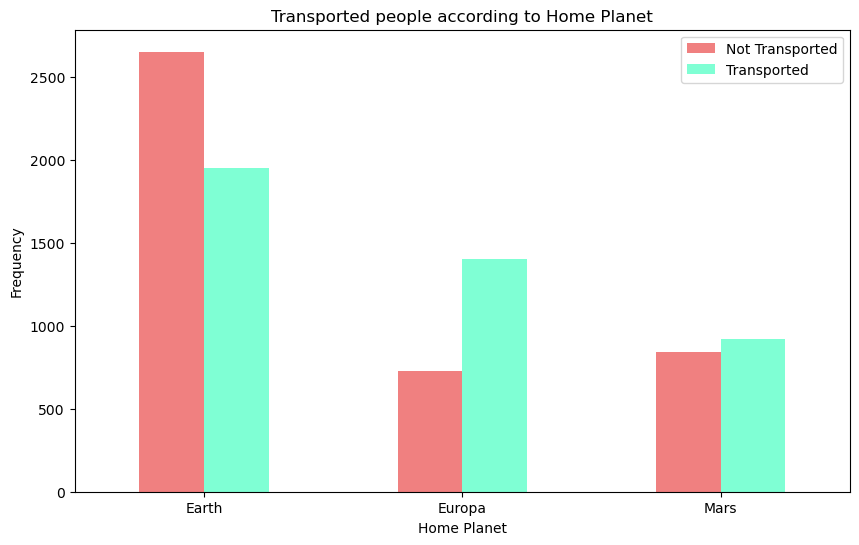

In [16]:
# Visulaizing the crosstab
pd.crosstab(df.HomePlanet, df.Transported).plot(kind="bar",
                                               figsize=(10,6),
                                               color=["lightcoral", "aquamarine"])
# Adding information to the plot
plt.title("Transported people according to Home Planet")
plt.xlabel("Home Planet")
plt.ylabel("Frequency")
plt.legend(["Not Transported", "Transported"])
plt.xticks(rotation=0);

In [17]:
unique_values

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [18]:
pd.crosstab(df.HomePlanet, df.CryoSleep)

CryoSleep   False  True 
HomePlanet              
Earth        3106   1382
Europa       1162    911
Mars         1047    669

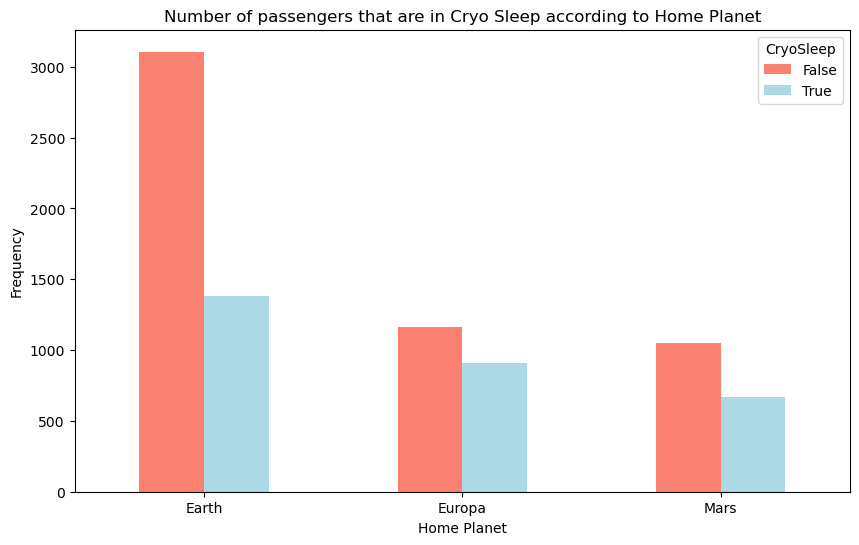

In [19]:
pd.crosstab(df.HomePlanet, df.CryoSleep).plot(kind="bar",
                                             figsize=(10,6),
                                             color=["salmon", "lightblue"])
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.xlabel("Home Planet")
plt.title("Number of passengers that are in Cryo Sleep according to Home Planet");

In [20]:
unique_values

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [21]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

C:\Users\samee\AppData\Local\Temp\ipykernel_12396\902793195.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000

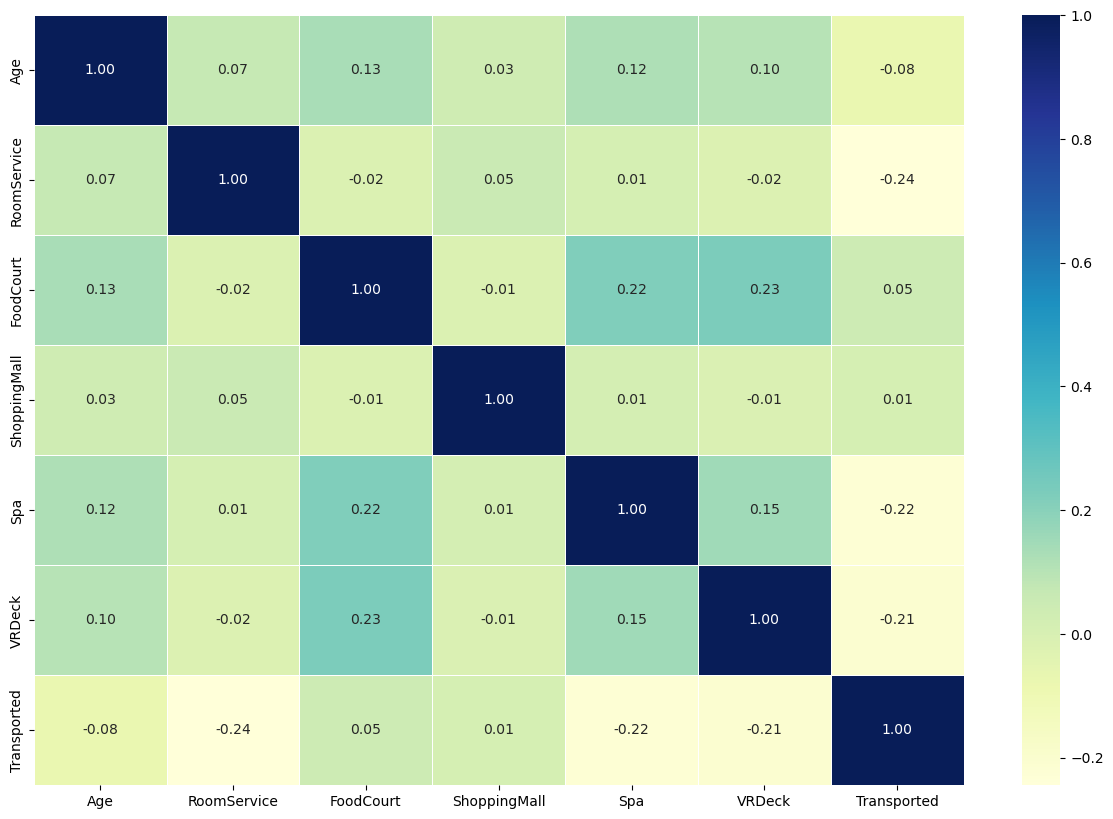

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Manipulating Data 
so that it can be used to train model

In [23]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [24]:
df["HomePlanet"].head()

0    Europa
1     Earth
2    Europa
3    Europa
4     Earth
Name: HomePlanet, dtype: object

In [25]:
# Converting PassengerId to numeric
df_mod = df
df_mod['PassengerId'] = df['PassengerId'].astype(str).astype(int)
df_mod

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0             101     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1             201      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2             301     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3             302     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4             401      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...           ...        ...       ...       ...            ...   ...    ...   
8688       927601     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689       927801      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690       927901      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691       928001     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692       928002     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [26]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   int32  
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(1), object(6)
memory usage: 857.5+ KB


In [27]:
# Converting string values into category values
for label, content in df_mod.items():
    if pd.api.types.is_string_dtype(content):
        df_mod[label] = content.astype("category").cat.as_ordered()

In [28]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   int32   
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   category
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   category
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(6), float64(6), int32(1)
memory usage: 1.1 MB


In [29]:
# Checking if there is any string column
for label, content in df_mod.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [30]:
# Saving data
df_mod.to_csv("modified-train-data.csv", index=False)

In [31]:
df_mod.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Filling missing values

In [32]:
# Checking for numeric data types
for label, content in df_mod.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [33]:
# Checking which numeric columns have null values
for label, content in df_mod.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [34]:
print(df_mod.Age.median())
print(df_mod.RoomService.median())
print(df_mod.FoodCourt.median())
print(df_mod.ShoppingMall.median())
print(df_mod.Spa.median())
print(df_mod.VRDeck.median())

27.0
0.0
0.0
0.0
0.0
0.0


In [35]:
print(df_mod.Age.mean())
print(df_mod.RoomService.mean())
print(df_mod.FoodCourt.mean())
print(df_mod.ShoppingMall.mean())
print(df_mod.Spa.mean())
print(df_mod.VRDeck.mean())

28.82793046746535
224.687617481203
458.07720329024676
173.72916912197996
311.1387779083431
304.8547912992357


In [36]:
# Filling missing numeric rows with --median
def fill_num_val(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

In [37]:
fill_num_val(df_mod)

In [38]:
# Checking which numeric columns have null values
def check_num_values(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label)

In [39]:
check_num_values(df_mod)

In [40]:
df_mod

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0             101     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1             201      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2             301     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3             302     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4             401      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...           ...        ...       ...       ...            ...   ...    ...   
8688       927601     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689       927801      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690       927901      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691       928001     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692       928002     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  Age_is_missing  RoomService_is_missing  \
0           False           False                   False   
1            True           False                   False   
2           False           False                   False   
3           False           False                   False   
4            True           False                   False   
...           ...             ...                     ...   
8688        False           False                   False   
8689        False           False                   False   
8690         True           False                   False   
8691        False           False                   False   
8692         True           False                   False   

      FoodCourt_is_missing  ShoppingMall_is_missing  Spa_is_missing  \
0                    False                    False           False   
1                    False                    False           False   
2                    False                    False           False   
3                    False                    False           False   
4                    False                    False           False   
...                    ...                      ...             ...   
8688                 False                    False           False   
8689                 False                    False           False   
8690                 False                    False           False   
8691                 False                    False           False   
8692                 False                    False           False   

      VRDeck_is_missing  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
8688              False  
8689              False  
8690              False  
8691              False  
8692              False  

[8693 rows x 20 columns]

In [41]:
df_mod.isna().sum()

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

## Filling categorical values into numbers

In [42]:
# Checking categorical variables
def check_cat_var(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            print(label)

In [43]:
check_cat_var(df_mod)

HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [44]:
# Filling categorical null values
def fill_cat_null_values(df):
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

In [45]:
fill_cat_null_values(df_mod)

In [46]:
pd.Categorical(df_mod["HomePlanet"]).codes

array([2, 1, 2, ..., 1, 2, 2], dtype=int8)

In [47]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              8693 non-null   int32  
 1   HomePlanet               8693 non-null   int8   
 2   CryoSleep                8693 non-null   int8   
 3   Cabin                    8693 non-null   int16  
 4   Destination              8693 non-null   int8   
 5   Age                      8693 non-null   float64
 6   VIP                      8693 non-null   int8   
 7   RoomService              8693 non-null   float64
 8   FoodCourt                8693 non-null   float64
 9   ShoppingMall             8693 non-null   float64
 10  Spa                      8693 non-null   float64
 11  VRDeck                   8693 non-null   float64
 12  Name                     8693 non-null   int16  
 13  Transported              8693 non-null   bool   
 14  Age_is_missing          

In [48]:
df_mod.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0          101           2          1    150            3  39.0    1   
1          201           1          1   2185            3  24.0    1   
2          301           2          1      2            3  58.0    2   
3          302           2          1      2            3  33.0    1   
4          401           1          1   2187            3  16.0    1   

   RoomService  FoodCourt  ShoppingMall  ...  FoodCourt_is_missing  \
0          0.0        0.0           0.0  ...                 False   
1        109.0        9.0          25.0  ...                 False   
2         43.0     3576.0           0.0  ...                 False   
3          0.0     1283.0         371.0  ...                 False   
4        303.0       70.0         151.0  ...                 False   

   ShoppingMall_is_missing  Spa_is_missing  VRDeck_is_missing  \
0                    False           False              False   
1                    False           False              False   
2                    False           False              False   
3                    False           False              False   
4                    False           False              False   

   HomePlanet_is_missing  CryoSleep_is_missing  Cabin_is_missing  \
0                  False                 False             False   
1                  False                 False             False   
2                  False                 False             False   
3                  False                 False             False   
4                  False                 False             False   

   Destination_is_missing  VIP_is_missing  Name_is_missing  
0                   False           False            False  
1                   False           False            False  
2                   False           False            False  
3                   False           False            False  
4                   False           False            False  

[5 rows x 26 columns]

In [49]:
df_mod.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Transported                0
Age_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
VIP_is_missing             0
Name_is_missing            0
dtype: int64

In [50]:
# Saving modified data
df_mod.to_csv("data/modified-data.csv", index=False)
print("Data Saved")

Data Saved


## Modelling

In [51]:
df_mod.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0          101           2          1    150            3  39.0    1   
1          201           1          1   2185            3  24.0    1   
2          301           2          1      2            3  58.0    2   
3          302           2          1      2            3  33.0    1   
4          401           1          1   2187            3  16.0    1   

   RoomService  FoodCourt  ShoppingMall  ...  FoodCourt_is_missing  \
0          0.0        0.0           0.0  ...                 False   
1        109.0        9.0          25.0  ...                 False   
2         43.0     3576.0           0.0  ...                 False   
3          0.0     1283.0         371.0  ...                 False   
4        303.0       70.0         151.0  ...                 False   

   ShoppingMall_is_missing  Spa_is_missing  VRDeck_is_missing  \
0                    False           False              False   
1                    False           False              False   
2                    False           False              False   
3                    False           False              False   
4                    False           False              False   

   HomePlanet_is_missing  CryoSleep_is_missing  Cabin_is_missing  \
0                  False                 False             False   
1                  False                 False             False   
2                  False                 False             False   
3                  False                 False             False   
4                  False                 False             False   

   Destination_is_missing  VIP_is_missing  Name_is_missing  
0                   False           False            False  
1                   False           False            False  
2                   False           False            False  
3                   False           False            False  
4                   False           False            False  

[5 rows x 26 columns]

In [52]:
df_mod["PassengerId"]

0          101
1          201
2          301
3          302
4          401
         ...  
8688    927601
8689    927801
8690    927901
8691    928001
8692    928002
Name: PassengerId, Length: 8693, dtype: int32

In [53]:
# df_train = df_mod.iloc[:6950]
# df_val = df_mod[6950:]
# df_train.shape, df_val.shape

In [54]:
# # Building training dataset
# X_train = df_train.drop("Transported", axis=1)
# y_train = df_train.Transported

# # Building validation dataset
# X_valid = df_val.drop("Transported", axis = 1)
# y_valid = df_val.Transported

# # Determing shape
# X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

In [55]:
X = df_mod.drop("Transported", axis=1)
y = df_mod["Transported"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6954, 25), (6954,), (1739, 25), (1739,))

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
rfc_score = clf.score(X_test, y_test)
rfc_score

0.7981598619896493

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
neigh_score = neigh.score(X_test, y_test)
neigh_score

0.5721679125934445

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
lr_score = lr.score(X_test, y_test)
lr_score

0.7832087406555491

In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [63]:
svc_score = svc.score(X_test, y_test)
svc_score

0.5687176538240368

In [64]:
model_scores = {
    "Random Forest Classifier" : rfc_score,
    "KNeighborsClassifier" : neigh_score,
    "Logistic Regression" : lr_score,
    "SVC Score" : svc_score
}
model_scores

{'Random Forest Classifier': 0.7981598619896493,
 'KNeighborsClassifier': 0.5721679125934445,
 'Logistic Regression': 0.7832087406555491,
 'SVC Score': 0.5687176538240368}

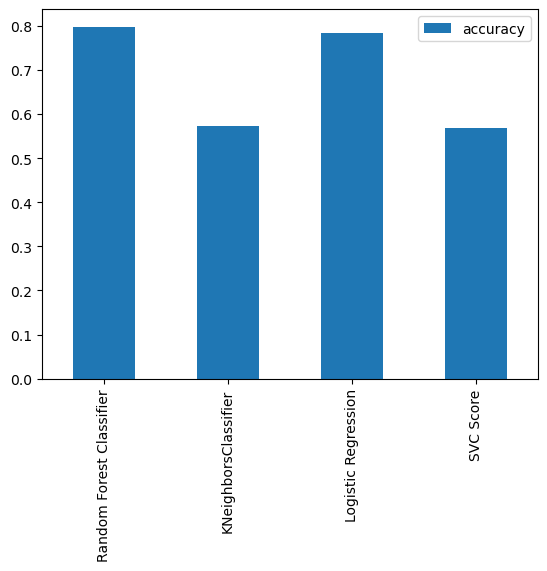

In [65]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar");

Since the most accurate model is RandomForestClassifier() we will tune hyperparameter on that

## GridsearchCV

In [66]:
grid = {
    "n_estimators" : [10, 100, 200, 500, 1000, 1200],
    "max_depth" : [None, 5, 10, 20, 30],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1, 20, 2),
    "max_features" : [0.5, 1, "sqrt"]
}

In [67]:
%%time
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
clf = RandomForestClassifier(n_jobs=-1,
                            max_samples=1000)
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid,
                     cv=5,
                     verbose=2)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8100 candidates, totalling 40500 fits
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.5s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estima

C:\Users\samee\miniconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=8, n_estimators=1200; total time= 7.8min
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=8, n_estimators=1200; total time=   2.3s
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=8, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=8, n_estimators=1200; total time=   2.1s
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=8, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=1, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=1, min_samples_

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=1000, n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [0.5, 1, 'sqrt'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': [10, 100, 200, 500, 1000, 1200]},
             verbose=2)

In [68]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [69]:
gs_clf.score(X_test, y_test)

0.8033352501437608

In [71]:
y_preds = gs_clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8033352501437608

In [74]:
grid_lr = {
    "penalty" : ['l1' , 'l2', 'elasticnet', None],
    "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    
}

In [75]:
lr = LogisticRegression(n_jobs=-1)
gs_lr = GridSearchCV(estimator=lr,
                    param_grid=grid_lr,
                    cv=5,
                    verbose=2)
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.6s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END .......................penalty=l1, solver=liblinear; total time=   1.5s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END ............................penalty=l1, solver=saga; total time=  27.2s
[CV] END ............................penalty=l1, solver=saga; total time=   1.3s
[CV] END ............................penalty=l1, solver=saga; total time=   1.2s
[CV] END ............................penalty=l1, solver=saga; total time=   1.7s
[CV] END ............................penalty=l1, solver=saga; total time=   0.5s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.7s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END .......................penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......................penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END .......................penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   1.8s
[CV] END ............................penalty=l2, solver=saga; total time=   0.3s
[CV] END ............................penalty=l2, solver=saga; total time=   0.3s
[CV] END ............................penalty=l2, solver=saga; total time=   0.3s
[CV] END ............................penalty=l2, solver=saga; total time=   0.3s
[CV] END ............................penalty=l2, solver=saga; total time=   0.3s
[CV] END ...................penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...................penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...................

C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

[CV] END .....................penalty=None, solver=newton-cg; total time=   1.8s
[CV] END .....................penalty=None, solver=newton-cg; total time=   1.5s
[CV] END .....................penalty=None, solver=newton-cg; total time=   1.6s
[CV] END .....................penalty=None, solver=newton-cg; total time=   1.5s
[CV] END .....................penalty=None, solver=newton-cg; total time=   1.6s
[CV] END ..........................penalty=None, solver=saga; total time=   0.3s
[CV] END ..........................penalty=None, solver=saga; total time=   0.3s
[CV] END ..........................penalty=None, solver=saga; total time=   0.3s
[CV] END ..........................penalty=None, solver=saga; total time=   0.3s
[CV] END ..........................penalty=None, solver=saga; total time=   0.3s


C:\Users\samee\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samee\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\samee\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Va

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']},
             verbose=2)

In [76]:
gs_lr.score(X_test, y_test)

0.78953421506613

In [77]:
model_scores

{'Random Forest Classifier': 0.7981598619896493,
 'KNeighborsClassifier': 0.5721679125934445,
 'Logistic Regression': 0.7832087406555491,
 'SVC Score': 0.5687176538240368}

In [78]:
gs_lr.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

# Working on test data

In [79]:
test_df = pd.read_csv('data/test.csv')
test_df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez  
...           ...        ...           ...     ...     ...               ...  
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley  

[4277 rows x 13 columns]

In [80]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [81]:
# Checking num values
check_num_values(test_df)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [82]:
fill_num_val(test_df)

In [83]:
check_num_values(test_df)

In [84]:
check_cat_var(test_df)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [85]:
fill_cat_null_values(test_df)

In [86]:
test_df

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0               1           1          2   2785            3  27.0    1   
1               2           1          1   1868            3  19.0    1   
2               3           2          2    258            1  31.0    1   
3               4           2          1    260            3  38.0    1   
4               5           1          1   1941            3  20.0    1   
...           ...         ...        ...    ...          ...   ...  ...   
4272         4273           1          2   2680            3  34.0    1   
4273         4274           1          1      0            3  42.0    1   
4274         4275           3          2    603            1  26.0    1   
4275         4276           2          1    604            0  26.0    1   
4276         4277           1          2   2681            2  43.0    1   

      RoomService  FoodCourt  ShoppingMall  ...  ShoppingMall_is_missing  \
0             0.0        0.0           0.0  ...                    False   
1             0.0        9.0           0.0  ...                    False   
2             0.0        0.0           0.0  ...                    False   
3             0.0     6652.0           0.0  ...                    False   
4            10.0        0.0         635.0  ...                    False   
...           ...        ...           ...  ...                      ...   
4272          0.0        0.0           0.0  ...                    False   
4273          0.0      847.0          17.0  ...                    False   
4274          0.0        0.0           0.0  ...                    False   
4275          0.0     2680.0           0.0  ...                    False   
4276          0.0        0.0           0.0  ...                    False   

      Spa_is_missing  VRDeck_is_missing  PassengerId_is_missing  \
0              False              False                   False   
1              False              False                   False   
2              False              False                   False   
3              False              False                   False   
4              False              False                   False   
...              ...                ...                     ...   
4272           False              False                   False   
4273           False              False                   False   
4274           False              False                   False   
4275           False              False                   False   
4276           False              False                   False   

      HomePlanet_is_missing  CryoSleep_is_missing  Cabin_is_missing  \
0                     False                 False             False   
1                     False                 False             False   
2                     False                 False             False   
3                     False                 False             False   
4                     False                 False             False   
...                     ...                   ...               ...   
4272                  False                 False             False   
4273                  False                 False              True   
4274                  False                 False             False   
4275                  False                 False             False   
4276                  False                 False             False   

      Destination_is_missing  VIP_is_missing  Name_is_missing  
0                      False           False            False  
1                      False           False            False  
2                      False           False            False  
3                      False           False            False  
4                      False           False            False  
...                      ...             ...              ...  
4272                   False           False            False  
4273                  

In [87]:
X_train.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
7031       748801           3          1   1969            3  29.0    1   
8648       922702           1          2   5280            2  11.0    1   
6349       671803           1          2   4692            3  27.0    1   
908         98202           1          1   5211            3  51.0    1   
6934       735601           1          2   4825            3  40.0    1   

      RoomService  FoodCourt  ShoppingMall  ...  FoodCourt_is_missing  \
7031        558.0        0.0         386.0  ...                 False   
8648          0.0        0.0           0.0  ...                 False   
6349          0.0        0.0           0.0  ...                 False   
908           0.0        0.0           4.0  ...                  True   
6934          0.0        0.0           0.0  ...                 False   

      ShoppingMall_is_missing  Spa_is_missing  VRDeck_is_missing  \
7031                    False           False              False   
8648                    False           False              False   
6349                    False           False              False   
908                     False           False              False   
6934                    False           False              False   

      HomePlanet_is_missing  CryoSleep_is_missing  Cabin_is_missing  \
7031                  False                 False             False   
8648                  False                 False             False   
6349                  False                 False             False   
908                   False                 False             False   
6934                  False                 False             False   

      Destination_is_missing  VIP_is_missing  Name_is_missing  
7031                   False           False            False  
8648                   False           False            False  
6349                   False           False            False  
908                    False           False            False  
6934                   False           False            False  

[5 rows x 25 columns]

In [88]:
test_df.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0            1           1          2   2785            3  27.0    1   
1            2           1          1   1868            3  19.0    1   
2            3           2          2    258            1  31.0    1   
3            4           2          1    260            3  38.0    1   
4            5           1          1   1941            3  20.0    1   

   RoomService  FoodCourt  ShoppingMall  ...  ShoppingMall_is_missing  \
0          0.0        0.0           0.0  ...                    False   
1          0.0        9.0           0.0  ...                    False   
2          0.0        0.0           0.0  ...                    False   
3          0.0     6652.0           0.0  ...                    False   
4         10.0        0.0         635.0  ...                    False   

   Spa_is_missing  VRDeck_is_missing  PassengerId_is_missing  \
0           False              False                   False   
1           False              False                   False   
2           False              False                   False   
3           False              False                   False   
4           False              False                   False   

   HomePlanet_is_missing  CryoSleep_is_missing  Cabin_is_missing  \
0                  False                 False             False   
1                  False                 False             False   
2                  False                 False             False   
3                  False                 False             False   
4                  False                 False             False   

   Destination_is_missing  VIP_is_missing  Name_is_missing  
0                   False           False            False  
1                   False           False            False  
2                   False           False            False  
3                   False           False            False  
4                   False           False            False  

[5 rows x 26 columns]

In [89]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Age_is_missing', 'RoomService_is_missing',
       'FoodCourt_is_missing', 'ShoppingMall_is_missing', 'Spa_is_missing',
       'VRDeck_is_missing', 'PassengerId_is_missing', 'HomePlanet_is_missing',
       'CryoSleep_is_missing', 'Cabin_is_missing', 'Destination_is_missing',
       'VIP_is_missing', 'Name_is_missing'],
      dtype='object')

In [91]:
X_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Age_is_missing', 'RoomService_is_missing',
       'FoodCourt_is_missing', 'ShoppingMall_is_missing', 'Spa_is_missing',
       'VRDeck_is_missing', 'HomePlanet_is_missing', 'CryoSleep_is_missing',
       'Cabin_is_missing', 'Destination_is_missing', 'VIP_is_missing',
       'Name_is_missing'],
      dtype='object')

In [92]:
test_df = test_df.drop('PassengerId_is_missing', axis = 1)

In [93]:
test_preds = gs_lr.predict(test_df)

In [95]:
test_preds

array([ True, False,  True, ...,  True,  True,  True])

In [96]:
getting_pass_id = pd.read_csv('data/test.csv')

In [97]:
getting_pass_id['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [98]:
df_preds = pd.DataFrame()

In [99]:
df_preds["PassengerId"] = getting_pass_id["PassengerId"]
df_preds["Transported"] = test_preds
df_preds

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [100]:
df_preds.to_csv('data/test_preds_2.csv', index=False)